In [1]:
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
from seirsplus.models import *
from seirsplus.networks import *
import networkx

/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.51.2-dppy0.10.0-3.gbfbd2eeae.dirty (/glob/development-tools/versions/oneapi/beta10/inteloneapi/intelpython/python3.7/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


In [2]:
s = 10000
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=0.5)


In [3]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


In [5]:
G_normal     = custom_exponential_graph(G1, scale=100)
# Social distancing interactions:
G_distancing = custom_exponential_graph(G1, scale=10)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(G1, scale=5)

In [6]:
G_normal.number_of_edges()

123849

In [7]:
G_distancing.number_of_edges()

25034

In [8]:
G_quarantine.number_of_edges()

9984

In [22]:
G1.number_of_edges()

169565

In [4]:
from seirsplus.models import *
from seirsplus.networks import *

In [2]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

In [16]:
model = SEIRSNetworkModel(G=G_normal, beta=0.95, sigma=0.8, gamma=0.2, initE= 1500, initI = 300)

In [17]:
#checkpoints = {'t': [20, 100], 'G': [G_distancing, G_normal], 'p': [0.1, 0.5], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02], 'phi_E':   [0.2, 0.2], 'phi_I':   [0.2, 0.2]}

model.run(T=300)#, checkpoints=checkpoints)

t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.85


True

In [ ]:
model.run(T=300, checkpoints=checkpoints)

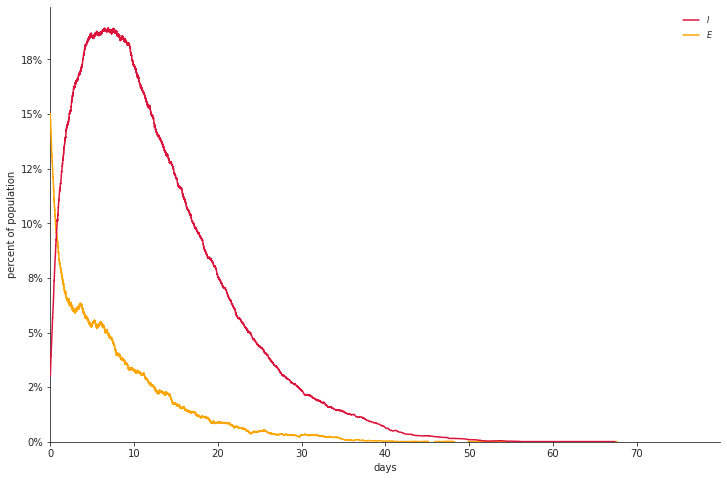

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8a2fca3d0>)

In [18]:
model.figure_basic(plot_S = 'False')

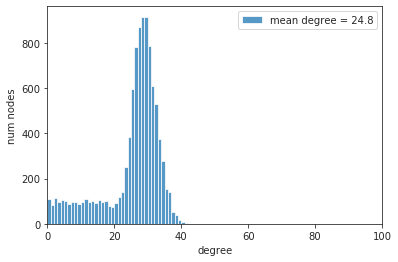

In [28]:
plot_degree_distn(G_normal, max_degree=40)

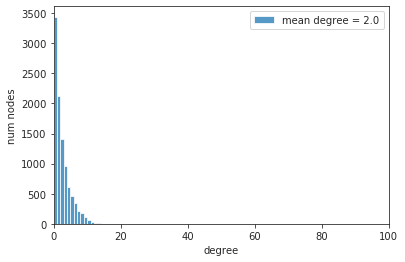

In [29]:
plot_degree_distn(G_quarantine, max_degree=100)

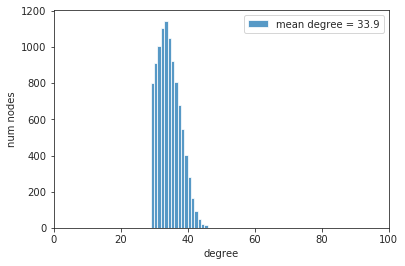

In [31]:
plot_degree_distn(G_distancing, max_degree=100)


In [25]:
model = SEIRSNetworkModel(G=G1, beta=0.95, sigma=0.8, gamma=0.2, initE= 1500, initI = 300)

In [26]:
model.run(T=300)

t = 0.00
t = 10.00
t = 20.00
t = 30.01
t = 40.00
t = 50.19
t = 60.05
t = 70.90


True

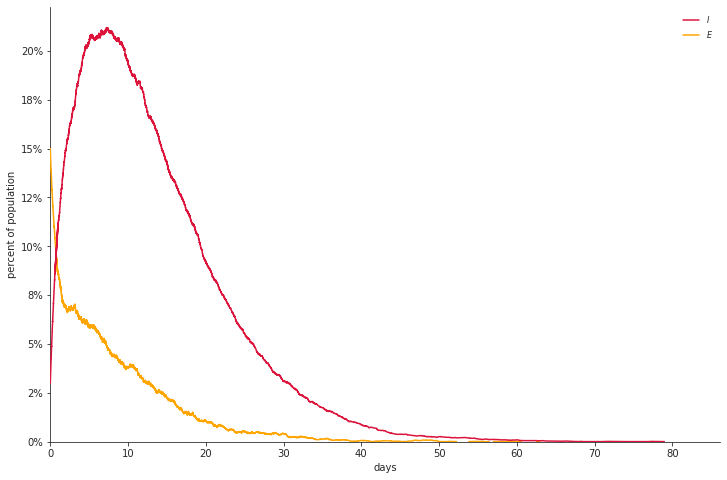

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8a1e53790>)

In [27]:
model.figure_basic(plot_S = 'False')

In [32]:
G2 = nx.empty_graph(n= 10000)

In [33]:
for n in range (123849):
    u = np.random.randint(10000)
    v = np.random.randint(10000)
    while(v!=u):
        v = np.random.randint(10000)
    G2.add_edge(u,v)
G2.number_of_edges()
    

10000

In [7]:
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
# Baseline normal interactions:
Gnb     = custom_exponential_graph(baseGraph, scale=100)

In [8]:
print(Gnb.number_of_edges())
print(baseGraph.number_of_edges())

65994
89919


In [23]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
print(G_distancing.number_of_edges())
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
print(G_quarantine.number_of_edges())

20614
10694


In [8]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

print(SIGMA)
print(GAMMA)
print(BETA)


0.1923076923076923
0.1
0.25


In [43]:
model = SEIRSNetworkModel(G       = Gnb, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          mu_I    = MU_I,
                          mu_0    = 0, 
                          nu      = 0, 
                          xi      = 0,
                          p       = P,
                          G_Q     = G_quarantine, 
                          beta_Q  = BETA_Q, 
                          sigma_Q = SIGMA,
                          gamma_Q = GAMMA, 
                          mu_Q    = MU_I,
                          theta_E = 0, 
                          theta_I = 0, 
                          phi_E   = 0, 
                          phi_I   = 0, 
                          psi_E   = 1.0, 
                          psi_I   = 1.0,
                          q       = Q,
                          initI   = numNodes/100, 
                          initE   = 0, 
                          initQ_E = 0, 
                          initQ_I = 0, 
                          initR   = 0, 
                          initF   = 0)

In [44]:
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, Gnb], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [45]:
model.run(T=300, checkpoints=checkpoints)

t = 0.05
t = 10.01
[Checkpoint: Updating parameters]
t = 20.00
t = 30.01
t = 40.00
t = 50.04
t = 60.00
t = 70.01
t = 80.00
t = 90.02
[Checkpoint: Updating parameters]
t = 100.02
t = 110.02
t = 120.00
t = 130.01
t = 140.14
t = 150.00
t = 160.02
t = 170.01
t = 180.01
t = 190.02
t = 200.01
t = 210.01
t = 220.01
t = 230.03
t = 240.06
t = 250.00
t = 260.13
t = 270.08
t = 280.12
t = 290.12
t = 300.09


True

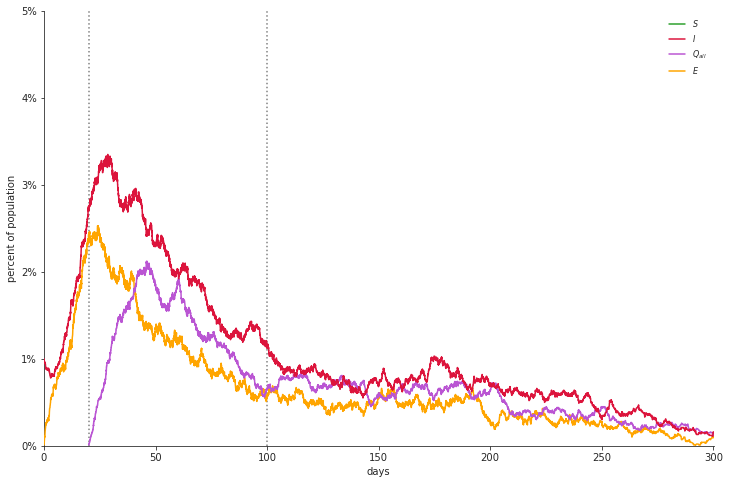

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe25c20ec90>)

In [46]:
model.figure_basic(vlines=checkpoints['t'], ylim=0.05)

In [40]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data,14,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
Gnu = custom_exponential_graph(G1, scale=100)

In [41]:
print(Gnu.number_of_edges())
print(G1.number_of_edges())

64522
76117


In [47]:
Gdu = custom_exponential_graph(G1, scale=10)
Gqu = custom_exponential_graph(G1, scale=5)

In [48]:
print(Gdu.number_of_edges())
print(Gqu.number_of_edges())

23069
11551


In [49]:
model_umap = SEIRSNetworkModel(G       = Gnu, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          mu_I    = MU_I,
                          mu_0    = 0, 
                          nu      = 0, 
                          xi      = 0,
                          p       = P,
                          G_Q     = Gqu, 
                          beta_Q  = BETA_Q, 
                          sigma_Q = SIGMA,
                          gamma_Q = GAMMA, 
                          mu_Q    = MU_I,
                          theta_E = 0, 
                          theta_I = 0, 
                          phi_E   = 0, 
                          phi_I   = 0, 
                          psi_E   = 1.0, 
                          psi_I   = 1.0,
                          q       = Q,
                          initI   = numNodes/100, 
                          initE   = 0, 
                          initQ_E = 0, 
                          initQ_I = 0, 
                          initR   = 0, 
                          initF   = 0)

In [50]:
checkpoints = {'t':       [20, 100], 
               'G':       [Gdu, Gnb], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [51]:
model_umap.run(T=300, checkpoints=checkpoints)

t = 0.07
t = 10.04
[Checkpoint: Updating parameters]
t = 20.00
t = 30.01
t = 40.05
t = 50.03
t = 60.07
t = 70.31
t = 80.13
t = 90.12
[Checkpoint: Updating parameters]
t = 100.01
t = 110.01
t = 120.06
t = 130.05
t = 140.01
t = 150.02
t = 160.01
t = 170.03
t = 180.02
t = 190.00
t = 200.07
t = 210.03
t = 220.01
t = 230.03
t = 240.02
t = 250.05
t = 260.01
t = 270.02
t = 280.00
t = 290.02
t = 300.00


True

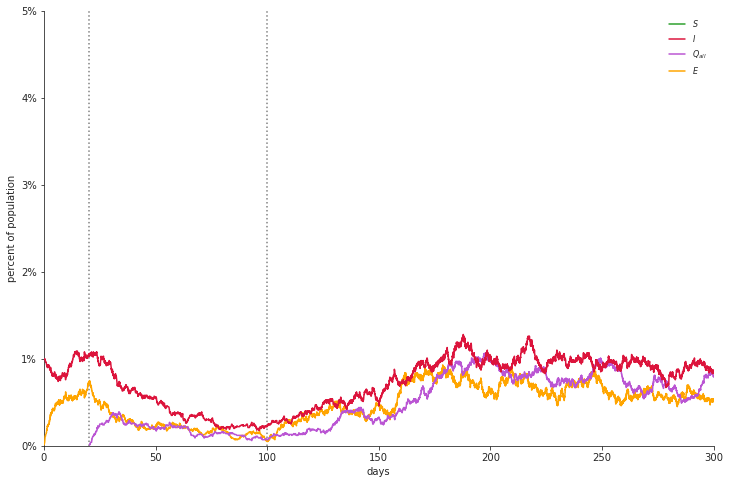

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe25bef5810>)

In [52]:
model_umap.figure_basic(vlines=checkpoints['t'], ylim=0.05)

In [53]:
model_base = SEIRSNetworkModel(G       = Gnb, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

In [54]:
model_base.run(T=300)

t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.02
t = 50.00
t = 60.01
t = 70.04
t = 80.03
t = 90.19
t = 100.12
t = 110.03
t = 120.12


True

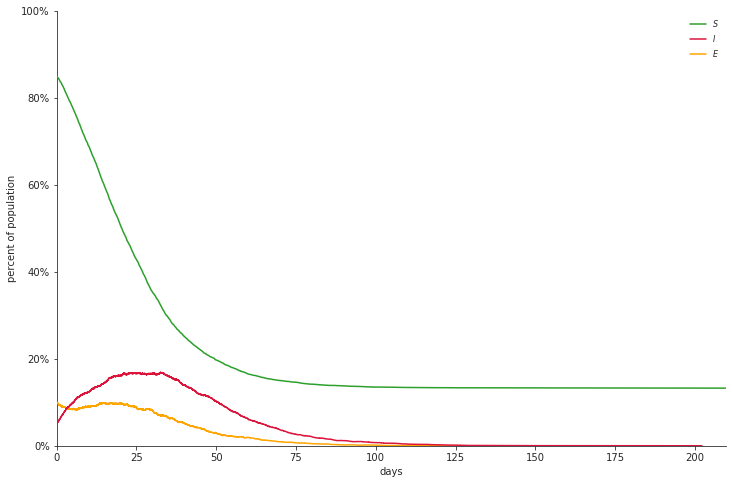

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe25c4b4050>)

In [58]:
model_base.figure_basic(ylim=1)

In [59]:
model_base = SEIRSNetworkModel(G       = Gnu, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

In [60]:
model_base.run(T=300)

t = 0.00
t = 10.00
t = 20.00
t = 30.02
t = 40.00
t = 50.01
t = 60.01
t = 70.03
t = 80.01
t = 90.11
t = 100.03
t = 110.17
t = 120.27
t = 160.28


True

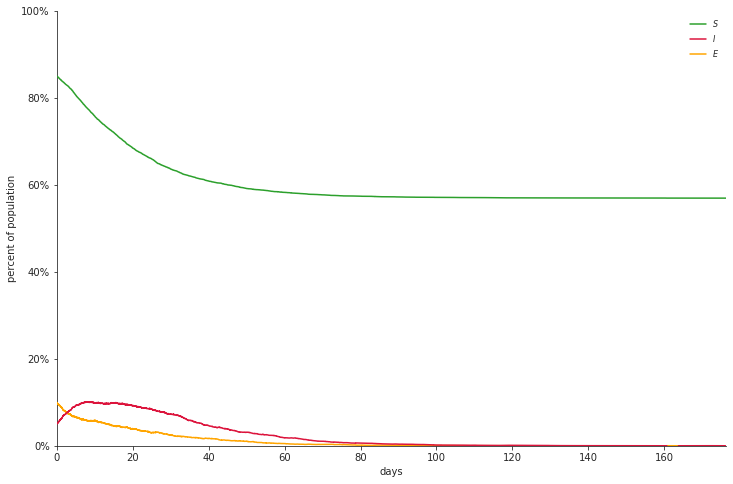

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe25bc2dd10>)

In [61]:
model_base.figure_basic(ylim=1)

In [62]:
model_base = SEIRSNetworkModel(G       = baseGraph, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

In [63]:
model_base.run(T=300)

t = 0.01
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.02
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.13
t = 110.49
t = 120.10
t = 130.10


True

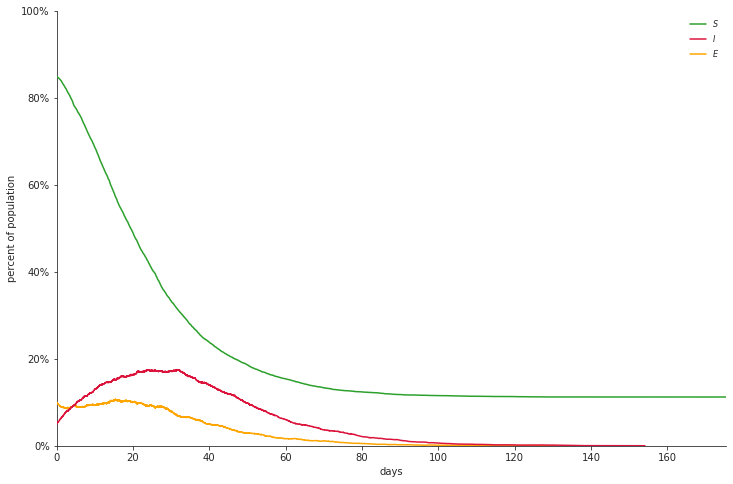

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe25c13be10>)

In [64]:
model_base.figure_basic(ylim=1)

In [67]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data,16,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
print(G1.number_of_edges())

87715


In [68]:
model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

In [69]:
model_base.run(T=300)

t = 0.00
t = 10.00
t = 20.00
t = 30.01
t = 40.01
t = 50.00
t = 60.01
t = 70.01
t = 80.07
t = 90.30
t = 100.39
t = 110.15
t = 120.18
t = 130.46
t = 140.43
t = 170.47


True

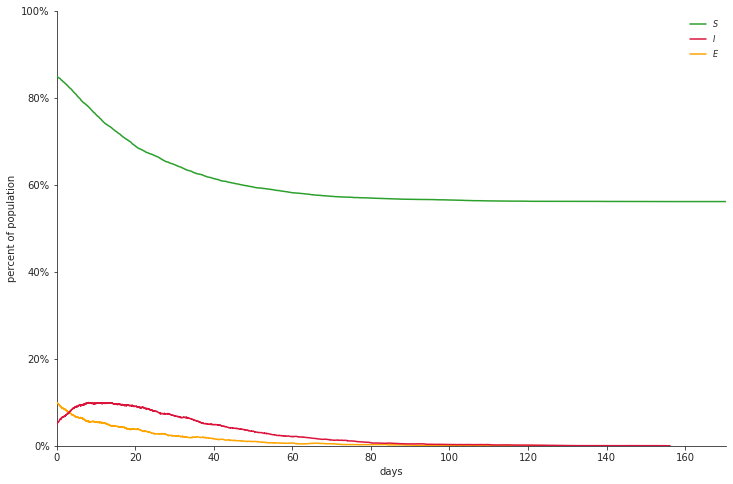

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1d7751990>)

In [70]:
model_base.figure_basic(ylim=1)

In [25]:
s = 10000
arr = [int(s)]
arr1 = [ int(s/2), int(s/2)]
arr2 = [ int(s/4), int(s/4), int(s/4), int(s/4)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)
data1, y1 = make_blobs(n_samples=arr1,n_features=2,random_state=16, cluster_std=1)
data2, y2 = make_blobs(n_samples=arr2,n_features=2,random_state=16, cluster_std=1)

In [26]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data2,14,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
Gnu = custom_exponential_graph(G1, scale=100)

In [27]:
print(Gnu.number_of_edges())
print(G1.number_of_edges())

64136
74807


In [28]:
model1 = SEIRSNetworkModel(G       = Gnu, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

model2 = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 1000, initI = 500)

In [29]:
model1.run(T=300)
model2.run(T=300)

t = 0.00
t = 10.01
t = 20.00
t = 30.01
t = 40.01
t = 50.01
t = 60.03
t = 70.09
t = 80.10
t = 90.00
t = 100.12
t = 110.10
t = 120.10
t = 130.12
t = 140.75
t = 150.97
t = 180.31
t = 0.00
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.01
t = 60.02
t = 70.01
t = 80.03
t = 90.02
t = 100.18
t = 110.72
t = 130.41
t = 140.67


True

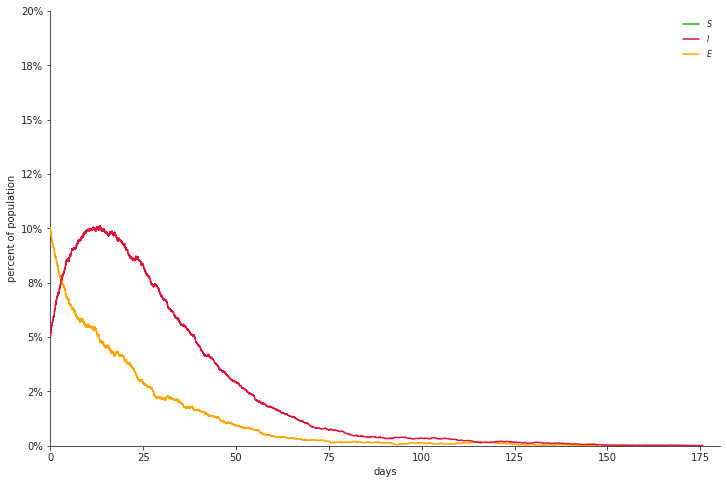

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91d5e12750>)

In [30]:
model1.figure_basic(ylim=0.2)

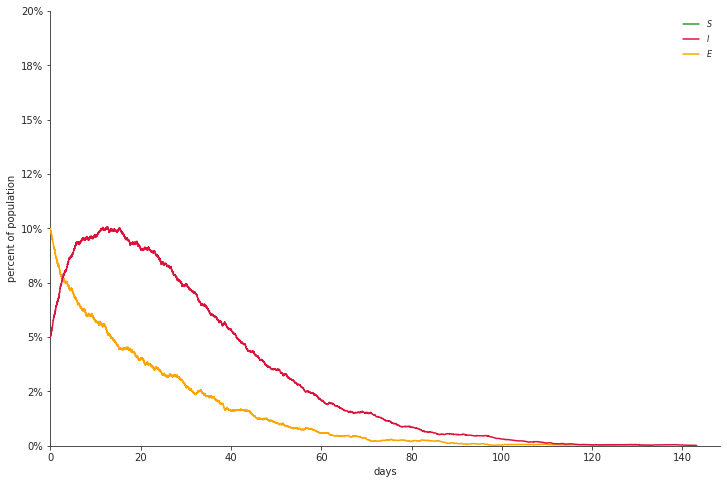

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91d6578810>)

In [31]:
model2.figure_basic(ylim=0.2)

In [3]:
arr = np.random.rand(100, 100)

In [11]:
arr1 = arr
for i in arr1:
    for k in range(100):
        if(i[k]<0.5):
            i[k]=0
        else:
            i[k]=1
arr1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
model1 = SEIRSNetworkModel(G       = arr, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 10, initI = 5)

model2 = SEIRSNetworkModel(G       = arr1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 10, initI = 5)

In [13]:
model1.run(T=300)
model2.run(T=300)

t = 0.39


AttributeError: 'numpy.ndarray' object has no attribute 'keys'